# Red Wine Quality Prediction

## Is quality in wine subjective or objective? <br>
### Read this very interesting wine blog https://wineandotherstories.com/the-six-attributes-of-quality-in-wine/ where the author poses the question of "Do I like the wine?" implying a personal preference vs "Is it a good wine?" implying quality as an objective factor of measurement.

### Dataset source: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

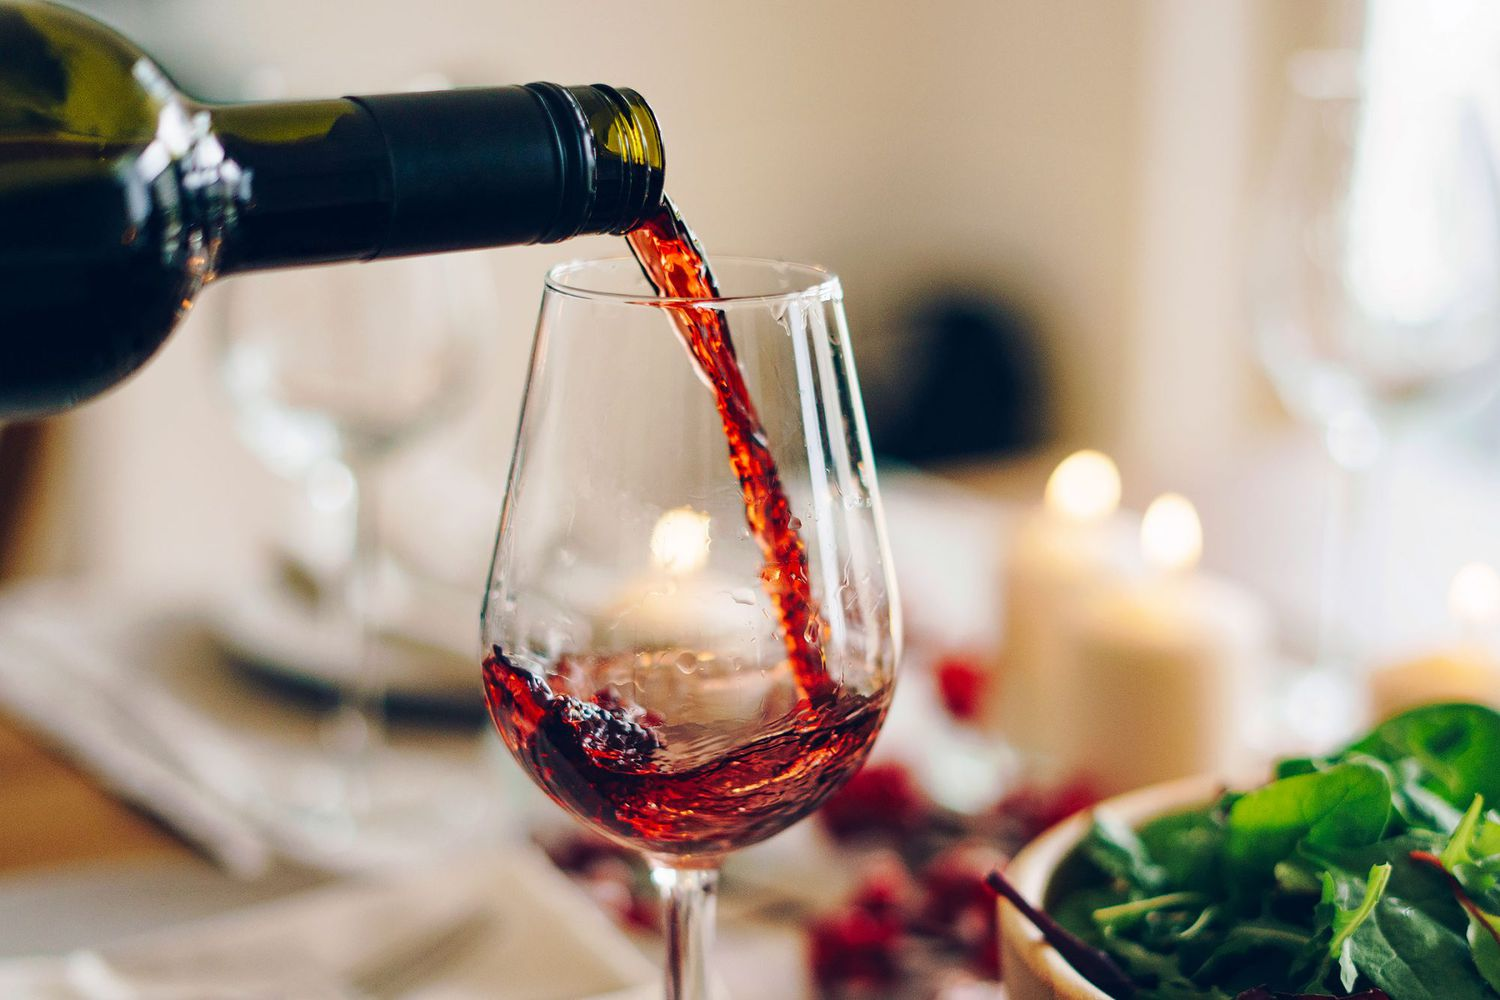

### Importing Libraries

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

### Loading the Dataset

In [18]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Checking for Missing Data

In [19]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Checking the Data Types of each columns

In [20]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Data Exploration

In [65]:
df_new = df.copy()
df_new['rating'] = pd.cut(df['quality'], bins=[0,3,7,10], labels=['bad', 'average', 'good'])
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average


### Performing EDA on the dataset 

**Independent Variable: Quality** <br>
Plotting the distribution of our independent variable quality. There are more values centered towards the mean, 5 and 6.<br>
Thus we found that the data is ***normally distributed***. 

https://public.tableau.com/app/profile/shruti3228/viz/Redwinequality/Sheet6

**Dependent Variables**<br>
Let us analyze the distribution of Dependent variables

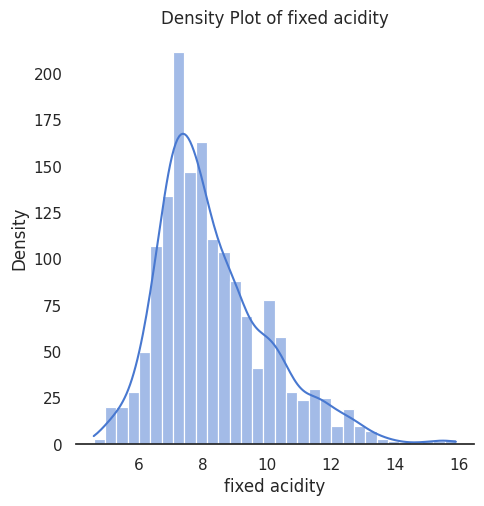

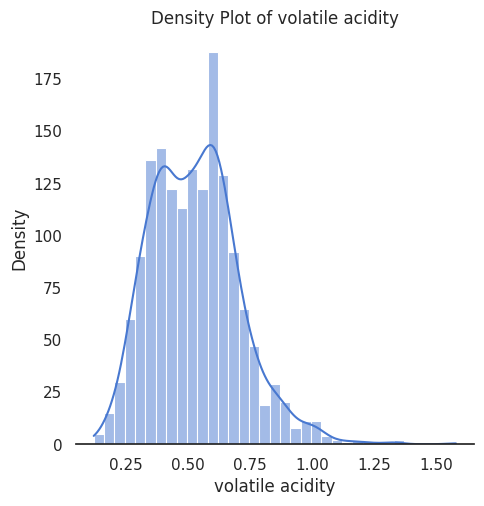

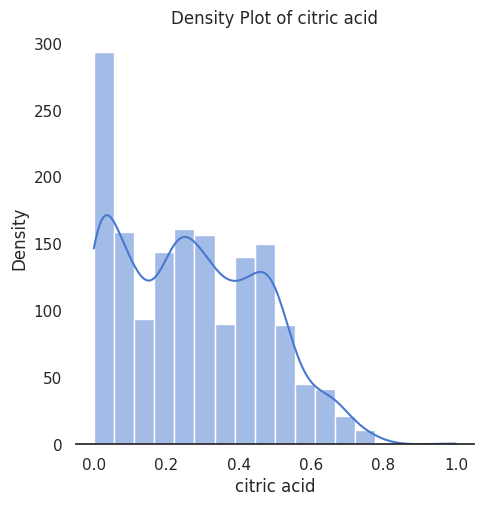

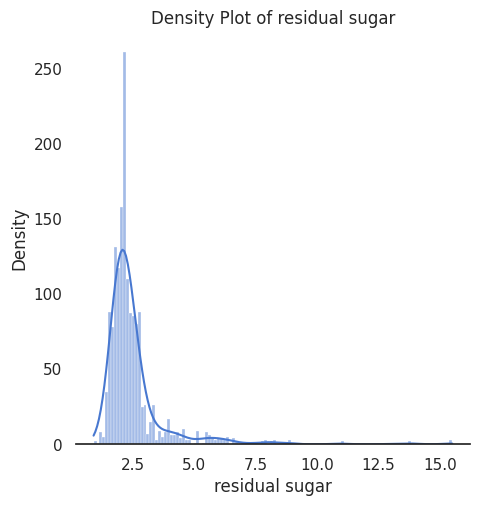

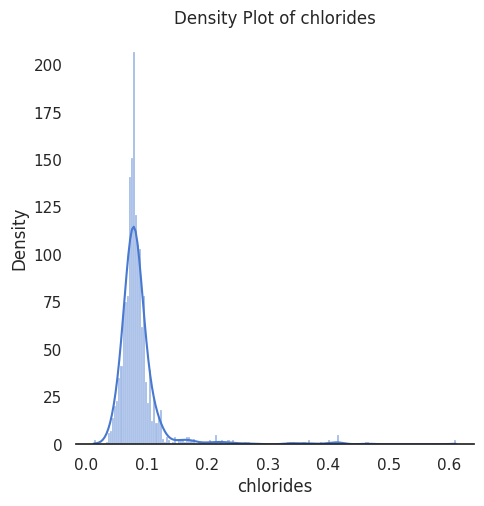

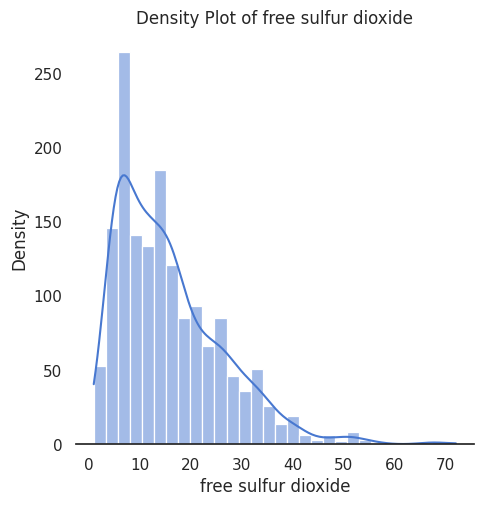

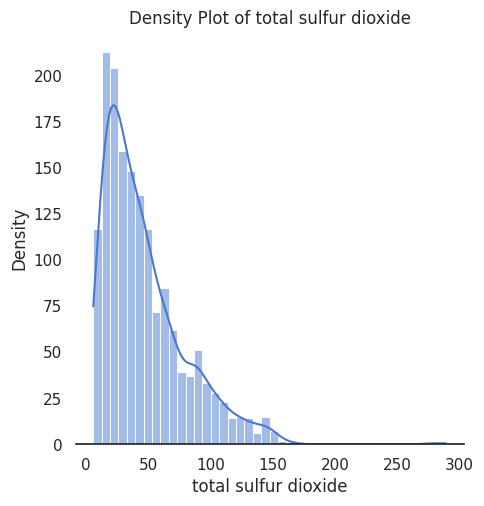

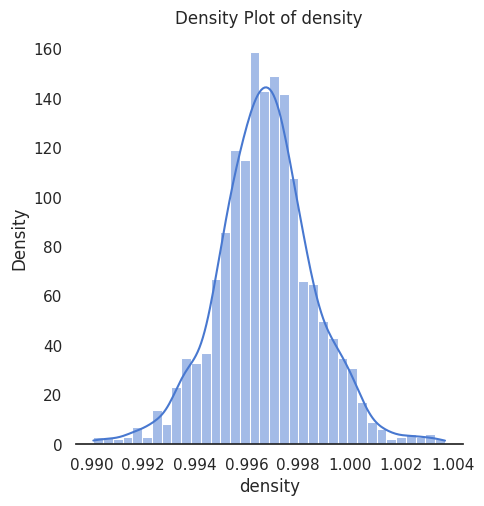

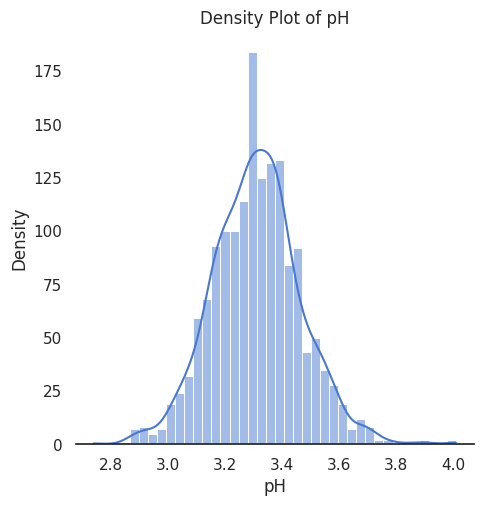

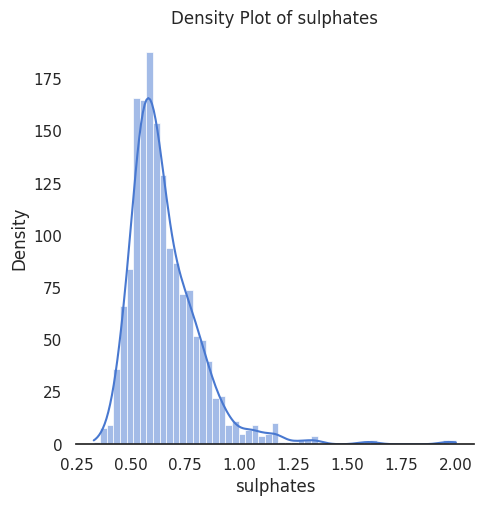

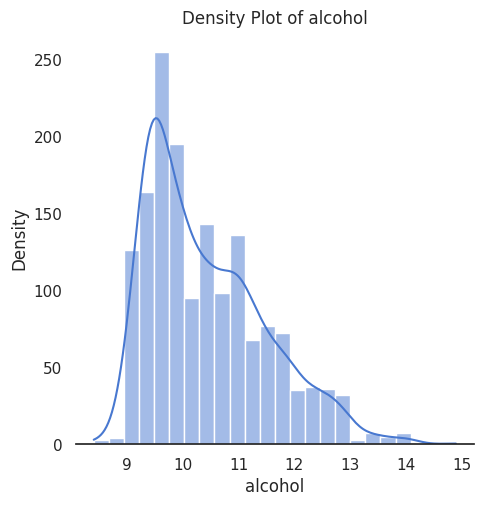

In [23]:
sns.set(style="white", palette="muted", color_codes=True)
for col in df.columns[:-1]:
    sns.displot(df[col], kde=True, color="b")
    sns.despine(left=True)
    plt.title(f"Density Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

We observed that chlorides is centered around 0.1, pH levels range between 3 and 4, distribution of fixed acidity is right skewed and centered around 8.<br>
Also, observe that a certain percent of our wine data doesn't have citric acid at all. Does that mean citric acid is not required in wines?

# What characteristics a good quality wine has?

### To determine which features affect the quality of a good wine, we run correlation analysis of our independent variable vs all the dependent variables. Here's the matrix:

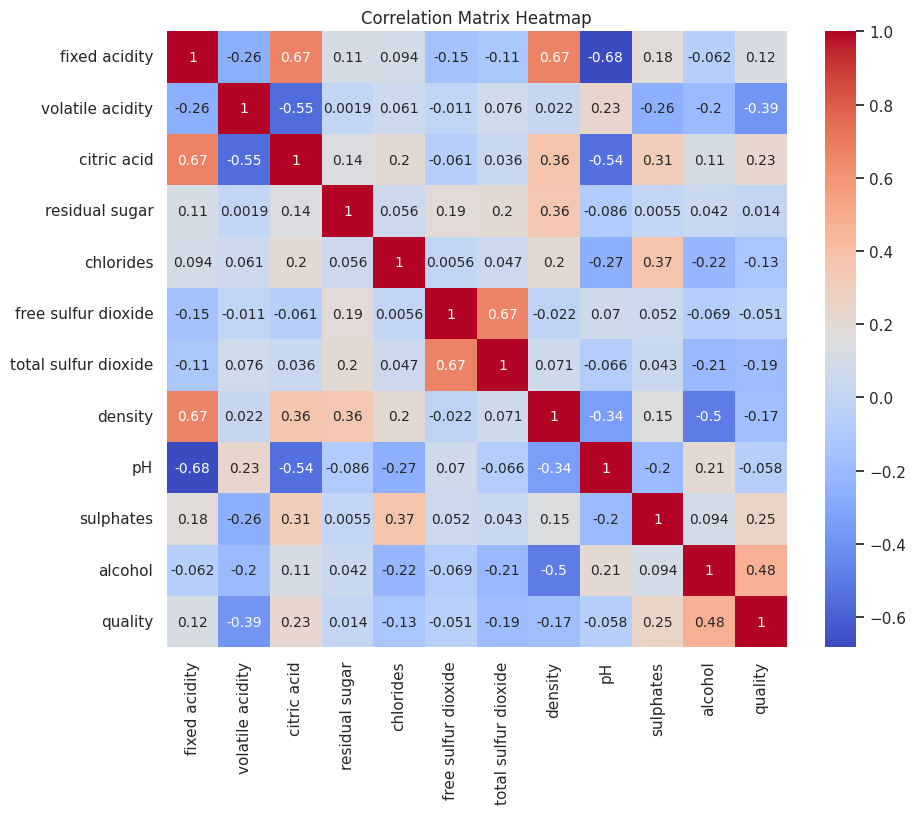

In [27]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, annot_kws={"size": 10})
plt.title("Correlation Matrix Heatmap")
plt.show()

## **Observations:**<br>
### **Positively correlated**: Fixed Acidity, Citric Acid, Residual Sugar, Sulphates, Alcohol <br>
### **Negatively correlated**: Volatile Acidity, Chlorides, Free Sulfur dioxide, total sulfur dioxide, density and pH

Let us check the behaviour of Alcohol and Wine Quality, since it has the highest correlation of 0.48<br>
Further analysis of how dependent variables affect the quality of red wine


The positive correlation between alcohol and wine quality indicates that a good quality wine has higher alcohol percentage. It's also illustrated using the box-plots. <br>
Wines with higher citric acids and positive correlation with fixed acidity, are also rated as better quality, as citric acid helps to improve balance and freshness of the wine.<br>
Volatile Acidity is negatively correlated as it measures the proportion of vinegar in wine. Higher amounts result in unpleasant vineger taste of the wine, which is also illustrated with box plot.


One would expect sugar or sweetness to be a key factor affecting the quality of wine. But we are in for a surprise! Residual sugar gives us an interesting understanding, it has little to no impact on the quality of wine, as illustrated by Box plot.

Other dependent variables, chlorides, and sulphur dioxide also seem to have no direct effect on the quality of red wine.

Other key observations between dependent variables:
As pH is the measure of acidity, it is negatively correlated with Fixed acidity. But it tends to have a slight positive correlation with volatile acidity.<br>
Citric acid also tends to positively correlate with Fixed acidity, as it majorly contributes to increase the acidity of red wine.<br>
Free Sulfur dioxide is also strongly positively related to total sulfur dioxide 

# Model Building

In [28]:
unique_vals_counts = df['quality'].value_counts()
print(unique_vals_counts)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


### Based on EDA and correlation analysis, we used three models to model our data:

## Implementing Baseline Model :Random Forest

In [103]:
X = df.drop(['quality'],axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

Evaluating the model:

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.75      0.73       130
           6       0.62      0.70      0.66       132
           7       0.62      0.48      0.54        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
print('Training Accuracy: ', rfc.score(X_train, y_train))
print('Testing Accuracy: ', rfc.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.659375


#Lets drop some columns and see the impact on model


In [107]:
df_feature_drop = df.copy()

In [108]:
a=df_feature_drop.drop(["free sulfur dioxide","residual sugar","pH"],axis=1)

In [109]:
a.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [110]:
X = a.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Training Accuracy: ', rfc.score(X_train, y_train))
print('Testing Accuracy: ', rfc.score(X_test, y_test))

[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 98 31  1  0]
 [ 0  0 33 93  6  0]
 [ 0  0  0 21 20  1]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.75      0.73       130
           6       0.62      0.70      0.66       132
           7       0.65      0.48      0.55        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy:  1.0
Testing Accuracy:  0.659375


Accuracy does not increase

## Let's see if accuracy increases with Scale normalization


In [121]:
X = a.drop('quality', axis=1)
mean = np.mean(X)
std = np.std(X)

X = (X - mean) / std
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [122]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Training Accuracy: ', rfc.score(X_train, y_train))
print('Testing Accuracy: ', rfc.score(X_test, y_test))

[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 98 31  1  0]
 [ 0  0 33 93  6  0]
 [ 0  0  0 22 19  1]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.75      0.73       130
           6       0.62      0.70      0.66       132
           7       0.63      0.45      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy:  1.0
Testing Accuracy:  0.65625


Accuracy still does not increase

## Which Features are more Important?

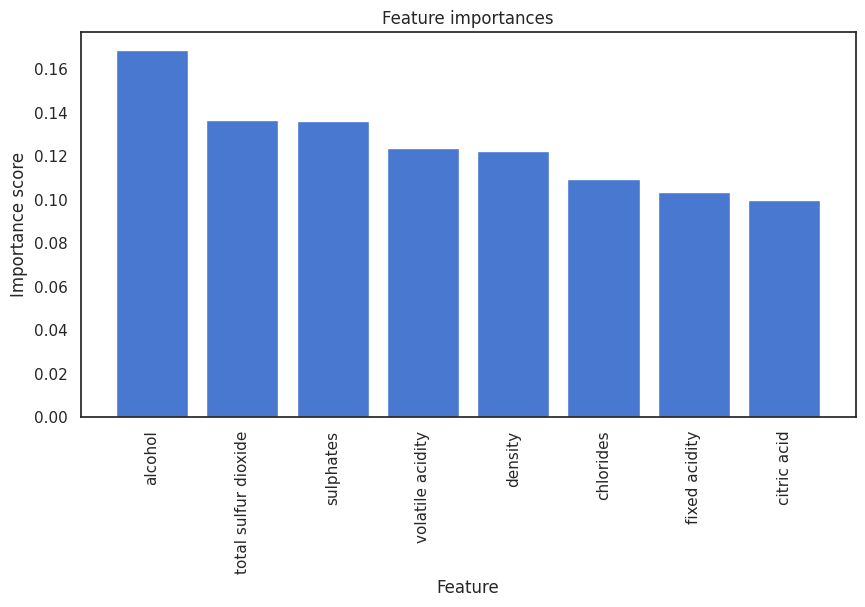

In [123]:
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance score")
plt.show()

In [115]:
list(X_train.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

## Applying PCA

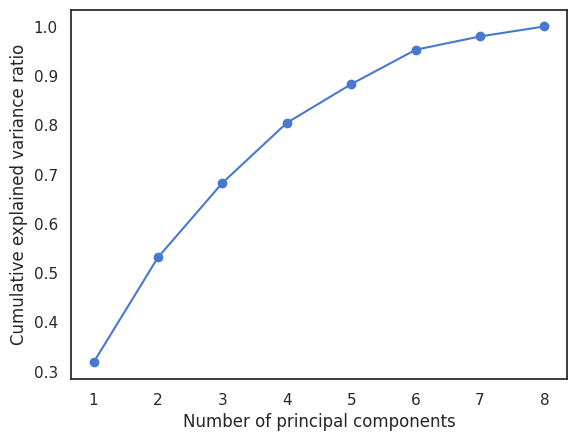

In [116]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_std)


explained_var = pca.explained_variance_ratio_


cumulative_var = np.cumsum(explained_var)

plt.plot(range(1,len(explained_var)+1), cumulative_var, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

In [117]:
pca = PCA(n_components=6)
pca.fit(X_std)
X_pca = pca.transform(X_std)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [119]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Training Accuracy: ', rfc.score(X_train, y_train))
print('Testing Accuracy: ', rfc.score(X_test, y_test))

[[ 0  0  0  1  0  0]
 [ 0  1  6  3  0  0]
 [ 0  0 99 31  0  0]
 [ 0  0 32 94  6  0]
 [ 0  0  1 20 20  1]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.72      0.76      0.74       130
           6       0.63      0.71      0.67       132
           7       0.67      0.48      0.56        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.50      0.34      0.36       320
weighted avg       0.67      0.67      0.65       320



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy:  1.0
Testing Accuracy:  0.66875


Accuracy increases slightly.

## Naive Bayes Classifier

In [86]:
rfc = GaussianNB()
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Training Accuracy: ', rfc.score(X_train, y_train))
print('Testing Accuracy: ', rfc.score(X_test, y_test))

[[ 0  0  1  0  0  0]
 [ 0  0  9  1  0  0]
 [ 1  1 88 39  0  1]
 [ 0  1 39 78 14  0]
 [ 0  0  1 36  5  0]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.64      0.68      0.66       130
           6       0.50      0.59      0.54       132
           7       0.22      0.12      0.15        42
           8       0.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.23      0.23      0.23       320
weighted avg       0.50      0.53      0.51       320

Training Accuracy:  0.5871774824081314
Testing Accuracy:  0.534375


We wanted to reduce the training accuracy for model prediction. Naturally, the testing accuracy also decreases.

## Logistic Regression


In [89]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [91]:
print('Training Accuracy: ', log_reg.score(X_train, y_train))
print('Testing Accuracy: ', log_reg.score(X_test, y_test))

Training Accuracy:  0.6004691164972635
Testing Accuracy:  0.578125


# Conclusion

### How does alcohol percent affect wine quality?
High alcohol percent tend to age the wine more slowly, that explains why a good quality wine has more alcohol percent.<br>
High alcohol percent should also have all the other components in similar intensity, or else the wine will taste unpleasant and 'hot'.<br>
It is also affects the body of red wine, meaning higher the alcohol content, fuller and richer the wine.<br>
That explains why alcohol is the most important feature contributing to the quality of a good wine.

### Residual Sugar : <br>
Another interesting finding was of residual sugar, one might presume that sweetness of red wine should affect the quality. However, our findings indicate that it does not. The common misconception of more sugar a wine has, lower it's quality was proven wrong. Although it is not a good indicator of quality, it is worth mentioning that after doing some research we found that it is nevertheless important to know the quantity of residual sugar. As it can impact food pairing with wine, health concerns and personal taste. 

Refernces:
https://www.masterclass.com/articles/learn-about-alcohol-content-in-wine-highest-to-lowest-abv-wines <br>
https://wineandotherstories.com/the-six-attributes-of-quality-in-wine/ <br>
https://rpubs.com/asmaa_jir/473500
